In [1]:
import csv
import os

## Function for Mean
def getMean(sample):
    sampleSize = len(sample)
    totalSumIncome = 0
    for row in sample:
        totalSumIncome = row + totalSumIncome
    mean = totalSumIncome / sampleSize
    return mean

## Function target sample variance
def getSampleVariance(sample):
    mean = getMean(sample)
    sumOfSquares = 0
    sampleSize = len(sample)
    for row in sample:
        deviationScore = row - mean
        sumOfSquares = deviationScore**2 + sumOfSquares
    variance = sumOfSquares / (sampleSize-1)
    return variance

## Function target sample Standard Deviation
def getSampleSD(sample):
    mean = getMean(sample)
    sumOfSquares = 0
    sampleSize = len(sample)
    for row in sample:
        deviationScore = row - mean
        sumOfSquares = deviationScore**2 + sumOfSquares
    
    variance = sumOfSquares / (sampleSize-1)
    sampleSD = variance**0.5
    return sampleSD

## Sample Standard Error
def getSampleStandardError(sample):
    sampleSize = len(sample)
    sampleSD = getSampleSD(sample)
    # standard error of the mean for the population
    SSE = sampleSD / sampleSize**0.5
    return SSE

In [2]:
##
def getPoolSD(sample1, sample2):
    variance1 = getSampleVariance(sample1)
    variance2 = getSampleVariance(sample2)
    sampleSize1 = len(sample1)
    sampleSize2 = len(sample2)
    if sampleSize1 == sampleSize2:
        pooledVariance = (variance1 + variance2)/2
        pooledSD = pooledVariance**0.5
    else:
        numerator = (sampleSize1-1)*variance1 + (sampleSize2-1)*variance2
        denominator = sampleSize1 + sampleSize2 - 2 #df for this test
        pooledSD = (numerator/denominator)**0.5
    return pooledSD

In [3]:
##
def twoIndependentSamplesTScore(sample1, sample2):
    mean1 = getMean(sample1)
    mean2 = getMean(sample2)
    sampleSize1 = len(sample1)
    sampleSize2 = len(sample2)
    pooledSD = getPoolSD(sample1, sample2)
    if sampleSize1 == sampleSize2:
        pooledSE = pooledSD*((2/sampleSize1)**0.5)
        t = (mean1 - mean2)/pooledSE
    else:
        print("Warning: Unequal Sample Sizes")
        pooledSE = pooledSD*(((1/sampleSize1) + (1/sampleSize2))**0.5)
        t = (mean1 - mean2)/pooledSE
    return t

In [4]:
##
def getCriticalT(alpha, df, testType = 'two-tailed'):
    if df > 120:
        df = 120
    criticalT = 0
    
    if testType == 'two-tailed':
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if int(row[0]) == df:
                    if float(row[2]) >= (float(1-(alpha/2))):
                        criticalT = float(row[1])
                        break
   
    elif testType == 'one-tailed positive':
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if int(row[0]) == df:
                    if float(row[2]) >= (float(1-(alpha))):
                        criticalT = float(row[1])
                        break

    elif testType == 'one-tailed negative':
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if int(row[0]) == df:
                    if float(row[2]) >= (float(alpha)):
                        criticalT = float(row[1])
                        break
    return criticalT

In [5]:
##
def getPFromT(t, df):
    p = None
    if df > 120:
        df = 120
    if t > 6:
        p = 1.0
    elif t < -6:
        p = 0.0
    elif t > -6 and t < 6:
        folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
        csv_file_path = os.path.join(folder_path, "t_table.csv")
        with open(csv_file_path, newline='') as tFile:
            tData = csv.reader(tFile)
            for row in tData:
                if float(row[1]) == round(float(t), 2):
                    p = float(row[2])
    return p

In [6]:
##
def twoIndependentSamplesTTest(sample1, sample2, alpha, testType='two-tailed'):
    sampleSize1 = len(sample1)
    sampleSize2 = len(sample2)
    df = sampleSize1 + sampleSize2 - 2
    critT = getCriticalT(alpha, df, testType)
    t = twoIndependentSamplesTScore(sample1, sample2)
    p = getPFromT(t, df)
    
    significant = False
    if testType == 'two-tailed':
        if t < -critT or t > critT:
            significant = True
    elif testType == 'one-tailed positive':
        if t > critT:
            significant = True
    elif testType == 'one-tailed negative':
        if t < -critT:
            significant = True
    
    return significant, t, critT, p
    

In [7]:
##
def getCI(sample, alpha):
    mean = getMean(sample)
    SSE = getSampleStandardError(sample)
    df = len(sample) - 1
    testType = 'two-tailed'
    critT = getCriticalT(alpha, df, testType)
    lowerCI = mean - critT*SSE
    upperCI = mean + critT*SSE
    error = critT*SSE
    return lowerCI, upperCI, error

In [8]:
## 

japaneseMaleIncomeData = []
japaneseFemaleIncomeData = []

folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
csv_file_path = os.path.join(folder_path, "usa.csv")
with open(csv_file_path, newline='') as myFile:
    data = csv.reader(myFile)
    for row in data:
        if row[6] != 'INCTOT':
            if int(row[6]) > 1:
                if int(row[6]) != 999999:
                    if int(row[1]) > 17:
                        if int(row[2]) == 5:
                            if int(row[0]) == 1:
                                japaneseMaleIncomeData.append(int(row[6]))
                            if int(row[0]) == 2:
                                japaneseFemaleIncomeData.append(int(row[6]))                               

In [9]:

import random
japaneseMaleIncomeSample = random.sample(japaneseMaleIncomeData, 100)
japaneseFemaleIncomeSample = random.sample(japaneseFemaleIncomeData, 100)

japanMaleMean = getMean(japaneseMaleIncomeSample)
japanFemaleMean = getMean(japaneseFemaleIncomeSample)

alpha = 0.05

testType = 'two-tailed'

sigBool, t, criticalT, p = twoIndependentSamplesTTest(japaneseMaleIncomeSample,
                                                     japaneseFemaleIncomeSample,
                                                     alpha, testType)
if sigBool:
    print('The two sample independent means T test was significant at alpha=', alpha, 
         'where p=', round(p, 5), ' and t=', round(t, 2), 
         '.\nCritical T: ', criticalT, 
         '\nMean Income for Japanese Males: ', round(japanMaleMean, 2),
         '\nMean Income for Japanese Females: ', round(japanFemaleMean, 2))
if not sigBool:
    print('The two sample independent means T test was NOT significant at alpha=', alpha, 
         'where p=', round(p, 5), ' and t=', round(t, 2), 
         '.\nCritical T: ', criticalT, 
         '\nMean Income for Japanese Males: ', round(japanMaleMean, 2),
         '\nMean Income for Japanese Females: ', round(japanFemaleMean, 2))   

    
## CIs
japanMaleLower, japanMaleUpper, japanMaleError = getCI(japaneseMaleIncomeSample, alpha)
japanFemaleLower, japanFemaleUpper, japanFemaleError = getCI(japaneseFemaleIncomeSample, alpha)


The two sample independent means T test was significant at alpha= 0.05 where p= 0.99986  and t= 3.75 .
Critical T:  1.98 
Mean Income for Japanese Males:  90711.6 
Mean Income for Japanese Females:  43707.1


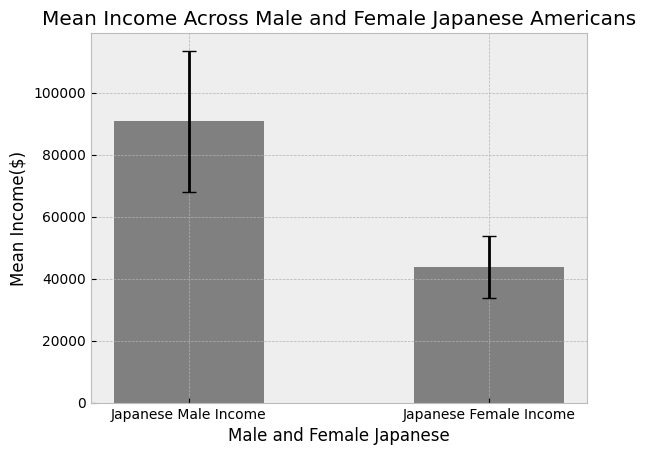

In [10]:

import matplotlib.pyplot as plt
plt.style.use('bmh')
labels = ['Japanese Male Income', 'Japanese Female Income']
means = [japanMaleMean, japanFemaleMean]
CIs = [japanMaleError, japanFemaleError]
positions = [0, 1]

plt.bar(positions, means, color='grey', yerr=CIs, width=0.5, 
        align='center', ecolor='black', capsize=5)
plt.xlabel('Male and Female Japanese')
plt.ylabel('Mean Income($)')
plt.title('Mean Income Across Male and Female Japanese Americans')
plt.xticks(positions, labels)
plt.show()
